# Convolutional Neural Networks
they perform better on image data

In [1]:
from tensorflow import keras
from keras.datasets import mnist
import pandas as pd
import numpy as np

(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape


11490434/11490434 [==============================] - 10s 1us/step


(60000, 28, 28)

In [2]:
X_test.shape

(10000, 28, 28)

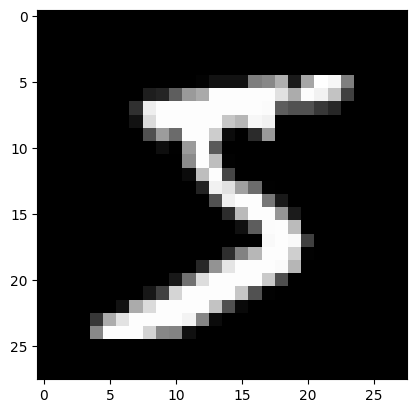

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

our labels need to be one hot encoded to be understandable by CNN

In [8]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [9]:
#scaling our data 
X_train.max()

255

In [10]:
X_train= X_train/255
X_test= X_test/255

## reshapping the data
our data is in (batch_size,width,height) format but we need to add color channels (batch_size,width,height, channels)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train= X_train.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

## creating the CNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten

model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #must flatten the images before the final layer

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  #final layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

## Training the model

In [16]:
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(patience=3)

In [17]:
model.fit(X_train, y_cat_train, epochs=20, callbacks=[early_stop], validation_data=(X_test, y_cat_test))

Epoch 1/20
1875/1875 [==============================] - 65s 33ms/step - loss: 0.1417 - accuracy: 0.9575 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 2/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0406 - val_accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0380 - val_accuracy: 0.9867
Epoch 4/20
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0420 - val_accuracy: 0.9866
Epoch 5/20
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 6/20
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0416 - val_accuracy: 0.9869


In [19]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141681,0.957533,0.051577,0.9831
1,0.047193,0.985767,0.040599,0.9861
2,0.030335,0.990350,0.038028,0.9867
3,0.020644,0.993467,0.041993,0.9866
4,0.014623,0.995033,0.042805,0.9873
5,0.009889,0.996933,0.041604,0.9869


<AxesSubplot: >

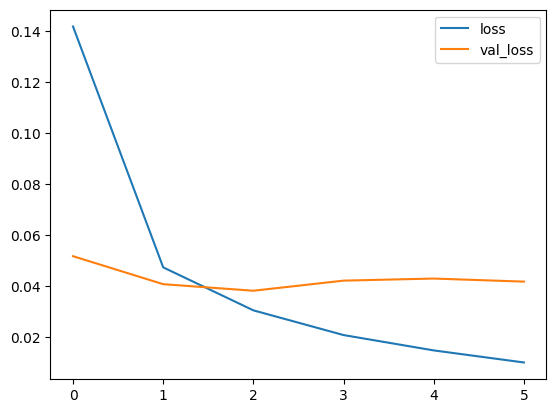

In [20]:
metrics[['loss', 'val_loss']].plot()

In [38]:
from sklearn.metrics import classification_report

preds= model.predict(X_test)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\dell\AppData\Local\Temp\ipykernel_11756\2018585923.py", line 3, in <module>
      preds= model.predict(X_test.reshape(-1,))
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Python310\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Python310\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Python310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Python310\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [32]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_56605]

In [31]:
# preds1=preds.reshape(10000,)
# preds1.shape
preds.shape

(10000, 10)

In [39]:
X_test.shape

(10000, 28, 28, 1)

In [29]:
X_test.shape

(10000, 28, 28, 1)

In [41]:
predictions = np.argmax(model.predict(X_test), axis=-1)


313/313 [==============================] - 3s 10ms/step


In [42]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
predictions.shape

(10000,)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



predicting a given image

In [45]:
my_image= X_test[0]
my_image.shape

(28, 28, 1)

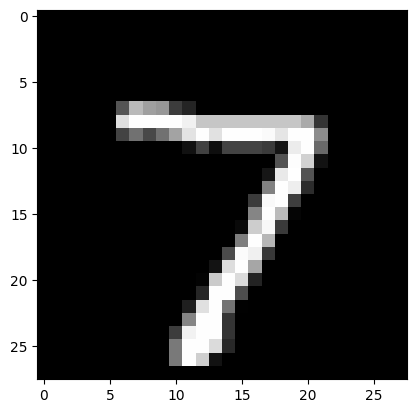

In [46]:
plt.imshow(my_image, cmap='gray')

In [50]:
np.argmax(model.predict(my_image.reshape(1,28,28,1)))

1/1 [==============================] - 0s 88ms/step


7